## Deep Learning
Utilizzando **Keras** e **Tensorflow**-  imparerete come:

- creare un'architettura di rete neurale completamente connessa
- applicare le reti neurali a due classici problemi di ML: regressione e classificazione
- addestrare le reti neurali con la discesa stocastica del gradiente e
- migliorare le prestazioni con il dropout, la normalizzazione dei lotti e altre tecniche.

Le esercitazioni vi introdurranno a questi argomenti con esempi completamente funzionanti, mentre negli esercizi esplorerete questi argomenti in modo più approfondito e li applicherete a insiemi di dati reali.

Negli ultimi anni, alcuni dei progressi più impressionanti dell'intelligenza artificiale sono stati compiuti nel campo del _Deep Learning_. La **Natural Language translation**, il riconoscimento delle immagini e i giochi sono tutti compiti in cui i modelli di deep learning hanno avvicinato o addirittura superato le prestazioni a livello umano.

**Che cos'è l'apprendimento profondo?** L'apprendimento profondo è un approccio all'apprendimento automatico caratterizzato da pile di calcoli profondi. Questa profondità di calcolo è ciò che ha permesso ai modelli di deep learning di districare i tipi di schemi complessi e gerarchici che si trovano nei dataset più impegnativi del mondo reale.

Grazie alla loro potenza e scalabilità, le **reti neurali** sono diventate il modello di riferimento dell'apprendimento profondo. Le reti neurali sono composte da neuroni, dove ogni neurone esegue singolarmente solo un semplice calcolo. La potenza di una rete neurale deriva invece dalla complessità delle connessioni che questi neuroni possono formare.

### The Linear Unit
Cominciamo quindi con il componente fondamentale di una rete neurale: il singolo neurone. Il diagramma di un neurone (o unità) con un ingresso si presenta come segue:
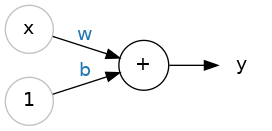
$$ The Linear Unit:  y=wx+b $$

L'input è **x**. La sua connessione al neurone ha un _weight_ che è **w**. Ogni volta che un valore passa attraverso una connessione, si moltiplica il valore per il weight della connessione. Per l'ingresso **x**, ciò che arriva al neurone è **w * x**. Una rete neurale "_impara_" modificando i suoi pesi.

Il **b** è un tipo speciale di peso che chiamiamo _bias_. Il bias non è associato ad alcun dato di input; al contrario, inseriamo un 1 nel diagramma in modo che il valore che raggiunge il neurone sia solo **b** (poiché 1 * b = b). Il bias consente al neurone di modificare l'output indipendentemente dagli ingressi.

La **y** è il valore che il neurone emette in definitiva. Per ottenere l'output, il neurone somma tutti i valori che riceve attraverso le sue connessioni. L'attivazione di questo neurone è $ y=wx+b $.
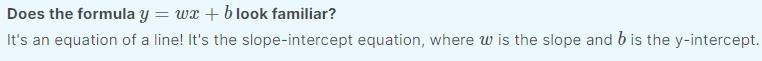

### Esempio
**The Linear Unit as a Model**  
Anche se i singoli neuroni di solito funzionano solo come parte di una rete più ampia, spesso è utile iniziare con un modello a singolo neurone come base di partenza. I modelli a singolo neurone sono modelli lineari.

Pensiamo a come potrebbe funzionare su un set di dati come 80 Cereali. Addestrando un modello con 'zuccheri' (grammi di zuccheri per porzione) come input e '_calorie_' (calorie per porzione) come output, potremmo scoprire che il bias è b=90 e il peso è w=2,5. Potremmo stimare il contenuto calorico di un cereale con 5 grammi di zucchero per porzione in questo modo:
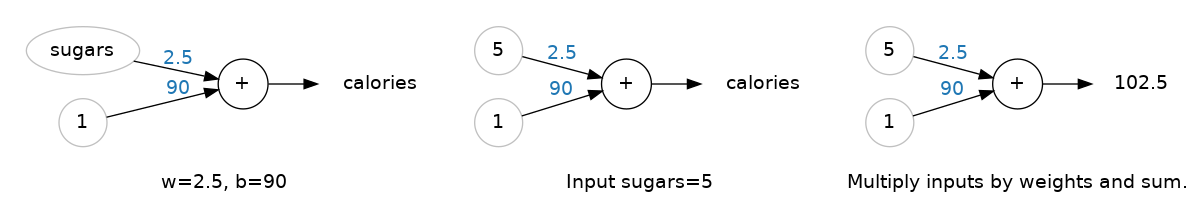
checking against our formula, we have  calories = 2.5 * 5 + 90 = 102.5, just like we expect

### Input Multipli
Il dataset 80 Cereals ha molte altre caratteristiche oltre agli "zuccheri". E se volessimo espandere il nostro modello per includere elementi come il contenuto di fibre o di proteine? È abbastanza facile. Basta aggiungere al neurone altre connessioni in ingresso, una per ogni caratteristica aggiuntiva. Per trovare l'uscita, dobbiamo moltiplicare ogni ingresso per il suo peso di connessione e poi sommarli tutti.
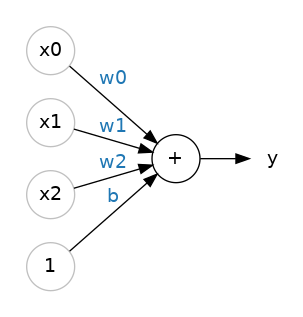
La formula per questo neurone sarebbe $ y=w_0x_0+w_1x_1+w_2x_2+b $ . Un'unità lineare con due ingressi si adatta a un piano, mentre un'unità con più ingressi si adatta a un iperpiano.

### Linear Units in Keras
Il modo più semplice per creare un modello in **Keras** è attraverso **keras.Sequential**, che crea una rete neurale come una pila di livelli. Possiamo creare modelli come quelli sopra descritti usando un livello denso (che impareremo a conoscere meglio nella prossima lezione).

Potremmo definire un modello lineare che accetta tre caratteristiche in ingresso ('zuccheri', 'fibre' e 'proteine') e produce un singolo output ('calorie') in questo modo:

In [6]:
from tensorflow import keras
from tensorflow.keras import layers

# Create a network with 1 linear unit
model = keras.Sequential([
    layers.Dense(units=1, input_shape=[3])
])

Con il primo argomento, unità, si definisce il numero di risultati che si desidera ottenere. In questo caso stiamo predicendo solo 'calorie', quindi useremo unità=1.

Con il secondo parametro, input_shape, indichiamo a Keras le dimensioni degli input. Impostando input_shape = [3], il modello accetterà tre caratteristiche come input ("zuccheri", "fibre" e "proteine").

Questo modello è ora pronto per essere adattato ai dati di allenamento!

I dati che utilizzeremo in questo corso saranno dati tabellari, come in un dataframe di Pandas. Avremo un input per ogni caratteristica del set di dati. Le caratteristiche sono disposte per colonna, quindi avremo sempre input_shape =[num_colonne]. Il motivo per cui **Keras** utilizza un elenco è per consentire l'uso di insiemi di dati più complessi. I dati delle immagini, ad esempio, potrebbero richiedere tre dimensioni: [altezza, larghezza, canali].

## Esercizi
Nel corso dell'esercitazione abbiamo imparato a conoscere gli elementi costitutivi delle reti neurali: le **unità lineari**. Abbiamo visto che un modello composto da una sola unità lineare si adatta a una funzione lineare di un insieme di dati (equivalente alla regressione lineare). In questo esercizio, costruiremo un modello lineare e faremo un po' di pratica con i **modelli in Keras**.

Prima di iniziare, eseguire la cella di codice qui sotto per impostare tutto.

In [8]:
# Setup plotting
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')

# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)

# Setup feedback system
from learntools.core import binder
binder.bind(globals())
from learntools.deep_learning_intro.ex1 import *

Il set di dati sulla qualità dei vini rossi è costituito da misure fisiochimiche di circa 1600 vini rossi portoghesi. Per ogni vino è inclusa anche una valutazione della qualità ottenuta da test di degustazione alla cieca.

Per prima cosa, eseguire la cella successiva per visualizzare le prime righe di questo set di dati.

In [9]:
import pandas as pd

red_wine = pd.read_csv('D:/Users/Alessio/OneDrive/Python/Kaggle/Intro to Deep Learning/red-wine.csv')
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


È possibile ottenere il numero di righe e colonne di un dataframe (o di un array Numpy) con l'attributo **shape**.

In [10]:
red_wine.shape # (rows, columns)

(1599, 12)

### Input Shape
Quanto possiamo prevedere la qualità percepita di un vino dalle misure fisiochimiche?

L'obiettivo è "qualità" e le altre colonne sono le caratteristiche. Come impostereste il parametro **input_shape** per un modello Keras su questo compito?

In [14]:
# YOUR CODE HERE
len_columns = len(red_wine.columns)

input_shape = [len_columns-1] # columns -1 e lista

# Check your answer
q_1.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

### Definisci il linear model
Definite ora un modello lineare adatto a questo compito. Prestate attenzione al numero di ingressi e uscite che il modello deve avere.

In [15]:
from tensorflow import keras
from tensorflow.keras import layers

# YOUR CODE HERE
model = keras.Sequential([
    layers.Dense(units=1, input_shape=[11])
])

# Check your answer
q_2.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

### Vedi i weight
Internamente, Keras rappresenta i pesi di una rete neurale con i tensori. I tensori sono fondamentalmente la versione di TensorFlow di un array Numpy, con alcune differenze che li rendono più adatti al deep learning. Una delle più importanti è che i tensori sono compatibili con gli acceleratori GPU e TPU. Le TPU, infatti, sono progettate specificamente per i calcoli con i tensori.

I pesi di un modello sono conservati nel suo attributo weights come elenco di tensori. Ottenere i pesi del modello definito in precedenza. (Se si vuole, si possono visualizzare i pesi con qualcosa di simile a: _print("Weights\n{}\n\nBias\n{}".format(w, b))._

In [16]:
# YOUR CODE HERE
w, b = model.weights

print("Weights\n{}\n\nBias\n{}".format(w, b))

# Check your answer
q_3.check()

Weights
<tf.Variable 'dense_5/kernel:0' shape=(11, 1) dtype=float32, numpy=
array([[-0.58759063],
       [-0.59718525],
       [-0.6944302 ],
       [ 0.00334054],
       [-0.17687345],
       [-0.01264101],
       [ 0.22671753],
       [-0.08201391],
       [ 0.46147984],
       [ 0.4480726 ],
       [ 0.19593245]], dtype=float32)>

Bias
<tf.Variable 'dense_5/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct:</span> Do you see how there's one weight for each input (and a bias)? Notice though that there doesn't seem to be any pattern to the values the weights have. Before the model is trained, the weights are set to random numbers (and the bias to 0.0). A neural network learns by finding better values for its weights.


A proposito, **Keras** rappresenta i _weight_ come _tensor_, ma usa anche i tensor per rappresentare i dati. Quando si imposta l'argomento **input_shape**, si indica a Keras la dimensione dell'array che deve aspettarsi per ogni esempio nei dati di addestramento. Impostando input_shape = [3] si creerebbe una rete che accetta vettori di lunghezza 3, come [0.2, 0.4, 0.6]).

### Plot l'output di un untrained linear model
I problemi su cui si lavora saranno problemi di regressione, in cui l'obiettivo è quello di prevedere un obiettivo numerico. I problemi di regressione sono come i problemi di "adattamento delle curve": stiamo cercando di trovare una curva che si adatti al meglio ai dati. Vediamo la "curva" prodotta da un modello lineare. (Probabilmente avrete intuito che si tratta di una linea).

Abbiamo detto che prima dell'addestramento i pesi del modello sono impostati in modo casuale. Eseguite la cella sottostante alcune volte per vedere le diverse linee prodotte con un'inizializzazione casuale.

4/4 [==============================] - 0s 1ms/step


Text(0.5, 1.0, 'Weight: -0.65\nBias: 0.00')

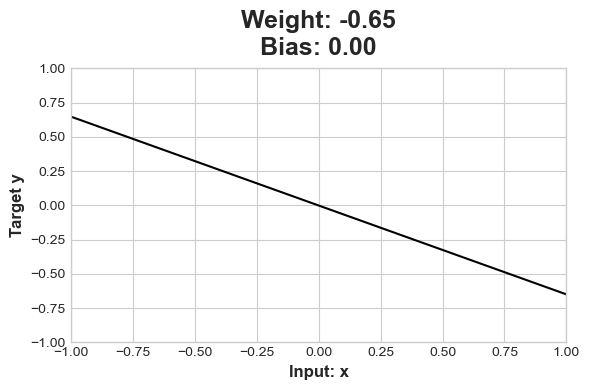

In [17]:
import tensorflow as tf
import matplotlib.pyplot as plt

model = keras.Sequential([
    layers.Dense(1, input_shape=[1]),
])

x = tf.linspace(-1.0, 1.0, 100)
y = model.predict(x)

plt.figure(dpi=100)
plt.plot(x, y, 'k')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel("Input: x")
plt.ylabel("Target y")
w, b = model.weights # you could also use model.get_weights() here
plt.title("Weight: {:0.2f}\nBias: {:0.2f}".format(w[0][0], b[0]))